In [1]:
import sys
sys.path.append("..") # dumb import fix

from src.data.data import AGNewsWord2Vec, AGNewsWord2VecDataset
from src.const import *
from src.training.trainer import Trainer
from src.models.cnn import CNNClassifier

In [ ]:
# Load Data
ds = AGNewsWord2Vec(DATA_DIR)
td = ds.get_torch_dataset("train")
vd = ds.get_torch_dataset("dev")


# td = AGNewsWord2VecDataset(split="train")
# vd = AGNewsWord2VecDataset(split="dev")

Sample of loaded data:
shape: (5, 4)
┌───────┬──────────────────────────┬─────────────────────────────────┬──────────────────────────┐
│ label ┆ title                    ┆ description                     ┆ text                     │
│ ---   ┆ ---                      ┆ ---                             ┆ ---                      │
│ i64   ┆ str                      ┆ str                             ┆ str                      │
╞═══════╪══════════════════════════╪═════════════════════════════════╪══════════════════════════╡
│ 4     ┆ RocketInfo Partners with ┆ RocketInfo Partners with Canad… ┆ RocketInfo Partners with │
│       ┆ Canad…                   ┆                                 ┆ Canad…                   │
│ 3     ┆ Oil Rebounds After Iraq  ┆ Oil prices rose on Friday as a… ┆ Oil Rebounds After Iraq  │
│       ┆ Pipeli…                  ┆                                 ┆ Pipeli…                  │
│ 3     ┆ US Second-Quarter GDP    ┆ The US economy grew more slowl… ┆ US Second-

╭──────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Loading pre-trained Word2Vec model...                                                            │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Loading pre-trained Word2Vec model...                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

/home4/s5195179/natural-language-processing/.venv/lib/python3.12/site-packages/gensim/models/keyedvectors.py:551: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  warnings.warn(


Output()

/home4/s5195179/natural-language-processing/notebooks/../src/utils/data.py:18: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:253.)
  self.X = as_tensor(X)


In [ ]:
# Setup model and trainer
max_len = 256
feature_len = 100

model = CNNClassifier(embedding_dim=feature_len, num_classes=4, filter_sizes=[3, 4, 5])
tr = Trainer(model=model,
        train_data=td, eval_data=vd)

Output()

In [5]:
tr.train(num_epochs=1, learning_rate=1e-3)

Output()

Training Batches ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:11

Evaluating ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00

Epoch 1/1, Loss: 0.8535

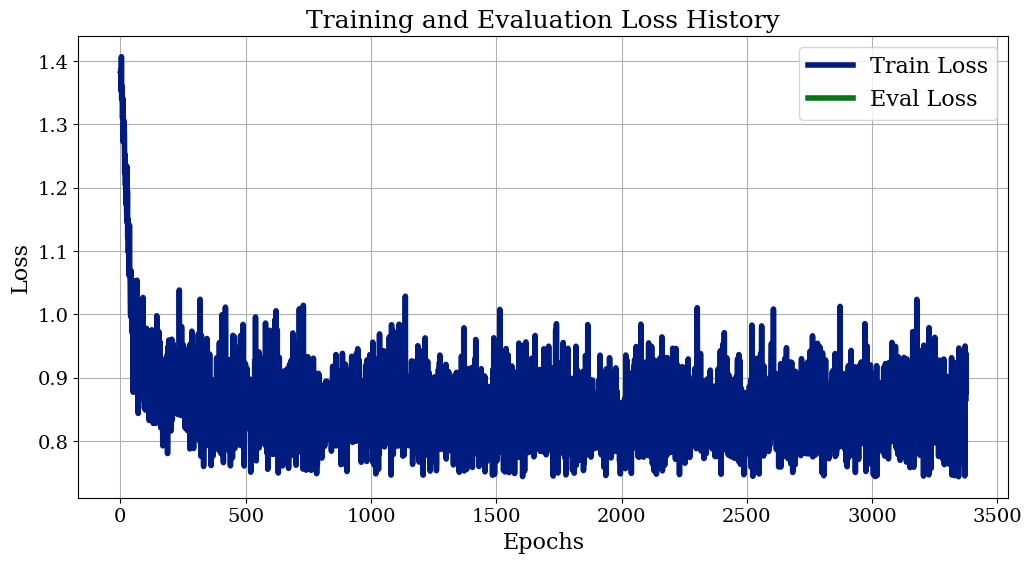

In [6]:
tr.plot_history()